In [1]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.express as px

import warnings
warnings.simplefilter("ignore")



In [2]:
homeFolder = '/Users/sbk/Documents/Datasets/Pancho/'
excelFile = homeFolder + 'Recetario Siam Thai 2.0.xlsx'
df = pd.read_excel(excelFile, sheet_name = 'Recetas')
df.rename(columns={'Área': 'Area'}, inplace=True)
df.Area[df.Area == 'cocina'] = 'Cocina'
df = df[np.in1d(df.Area, ['Barra', 'Cocina'])]
#df = df.dropna(inplace=True).reset_index(drop = True)

bdf = pd.DataFrame({'Insumo': df['Insumo'].astype('category'), 
                    'Producto': df['Producto'].astype('category'),
                    'Area': df['Area'].astype('category')})

#df = bdf.dropna(subset=['Area'])

# Check if all values in the 'Area' column are strings
#mask = bdf['Area'].apply(lambda x: isinstance(x, str))

# Filter bdf based on the mask
#bdf_filtered = bdf[(mask) & np.in1d(bdf.Area, ['Barra', 'Cocina'])]

# Reset the indexx
bdf.reset_index(drop=True, inplace=True)
bdf.head()


,Insumo,Producto,Area
0,Gin Provincia Andes Dry 700ml,2 x día Gin&Tonic,Barra
1,Schweppes Agua Tónica Lata 350ml,2 x día Gin&Tonic,Barra
2,Hielo Cubo 2kg,2 x día Gin&Tonic,Barra
3,Bitter Cocoa,A la pera,Barra
4,Deshidratado,A la pera,Barra


In [165]:
import plotly.express as px

# Assuming bdf is already defined
# Group the data by 'Producto' and 'Insumo', and sum the quantities
grouped_data = bdf[bdf.Area == 'Barra'].groupby(['Area', 'Producto', 'Insumo']).size().reset_index(name='Quantity')


In [166]:
grouped_data = grouped_data[grouped_data['Quantity'] != 0]
grouped_data = grouped_data.sort_values(by='Quantity', ascending=False)
grouped_data.reset_index(drop = True, inplace = True)


In [172]:
a = grouped_data.groupby(['Producto']).size().reset_index(name='Quantity')
a = a.sort_values(by='Quantity', ascending=False)
a.reset_index(drop = True, inplace = True)
a.head()

,Producto,Quantity
0,Mojito Mekong FMP,12
1,Mojito Mekong FREE,12
2,Mojito mekong,12
3,Kentucky Mule,9
4,Eren Jager,9


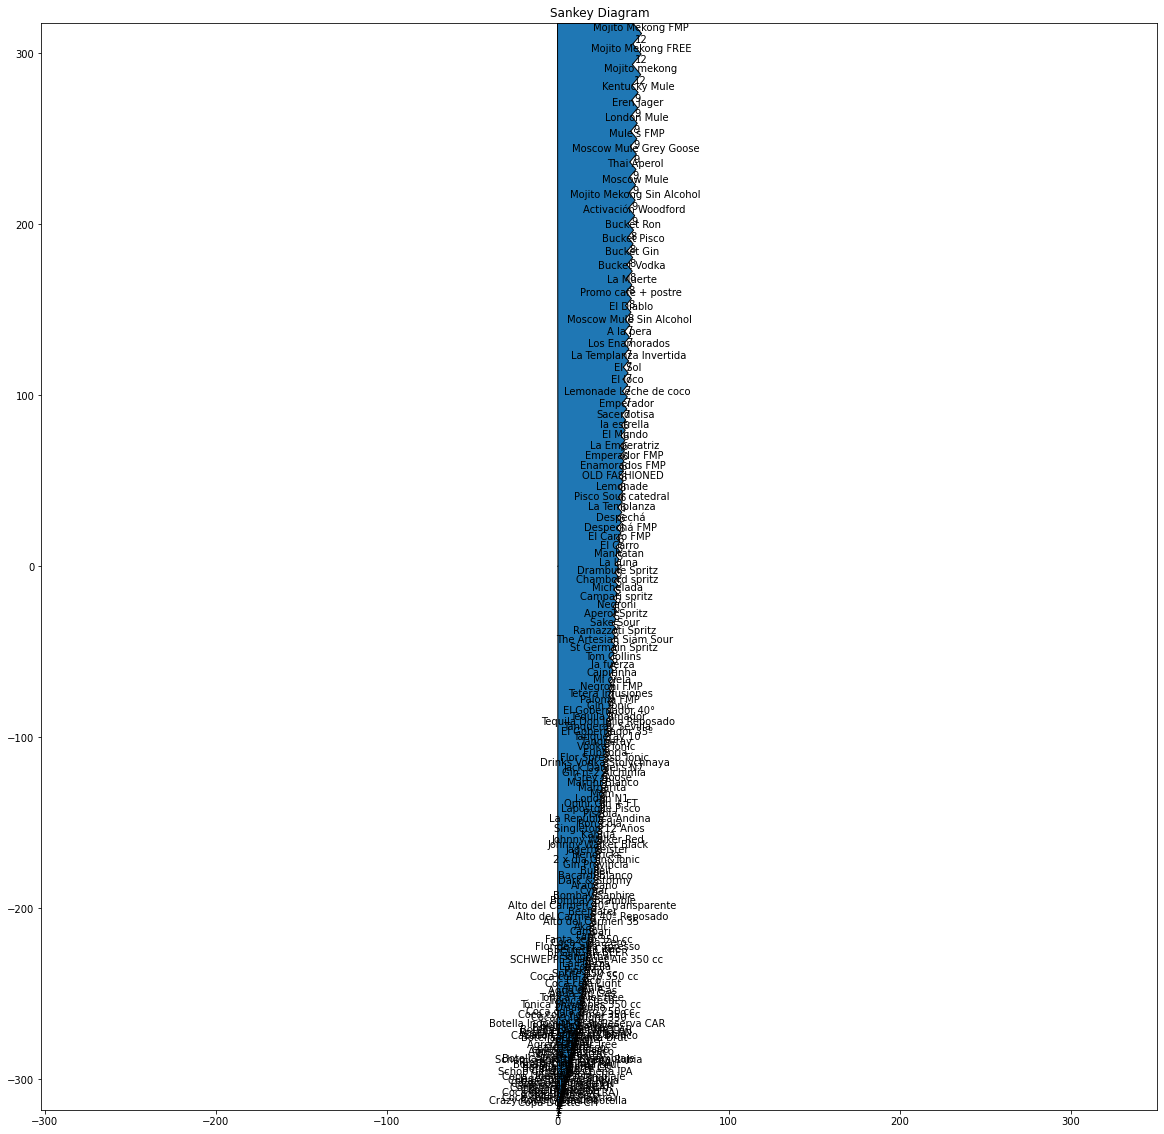

In [173]:
from matplotlib.sankey import Sankey

# Create Sankey flows and labels
flows = []
labels = []
for index, row in a.iterrows():
    label = f"{row['Producto']}"
    labels.append(label)
    flows.append(row['Quantity'])


# Plot Sankey diagram
fig, ax = plt.subplots(figsize = (20,20))
sankey = Sankey(ax=ax)
sankey.add(flows=flows, labels=labels)
sankey.finish()
plt.title('Sankey Diagram')
plt.show()

In [ ]:
does the number of ingredients used have to do with their price cost/sell??

In [121]:
import plotly.graph_objects as go

# Create a Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=grouped_data['Insumo'].unique().tolist() + grouped_data['Producto'].unique().tolist(),
    ),
    link=dict(
        source=[grouped_data['Insumo'].unique().tolist().index(i) for i in grouped_data['Insumo']] +
               [len(grouped_data['Insumo'].unique().tolist()) + 
                grouped_data['Producto'].unique().tolist().index(p) for p in grouped_data['Producto']],
        target=[len(grouped_data['Insumo'].unique().tolist()) + 
                grouped_data['Producto'].unique().tolist().index(p) for p in grouped_data['Producto']],
        value=grouped_data['Quantity']
    )
)])

# Update layout
fig.update_layout(title_text="Flow of Ingredients to Products",
                  font=dict(size=10),
                  width = 400)

# Show the plot
fig.show()


In [109]:
import plotly.graph_objects as go

# Create a Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=grouped_data['Insumo'].unique().tolist() + 
              grouped_data['Producto'].unique().tolist() + 
              grouped_data['Area'].unique().tolist()
    ),
    link=dict(
        source=[grouped_data['Insumo'].unique().tolist().index(i) for i in grouped_data['Insumo']] +
               [len(grouped_data['Insumo'].unique().tolist()) + 
                grouped_data['Producto'].unique().tolist().index(p) for p in grouped_data['Producto']] +
               [len(grouped_data['Insumo'].unique().tolist()) + 
                len(grouped_data['Producto'].unique().tolist()) + 
                grouped_data['Area'].unique().tolist().index(a) for a in grouped_data['Area']],
        target=[len(grouped_data['Insumo'].unique().tolist()) + 
                grouped_data['Producto'].unique().tolist().index(p) for p in grouped_data['Producto']] +
               [len(grouped_data['Insumo'].unique().tolist()) + 
                len(grouped_data['Producto'].unique().tolist()) + 
                grouped_data['Area'].unique().tolist().index(a) for a in grouped_data['Area']] +
               [len(grouped_data['Insumo'].unique().tolist()) + 
                len(grouped_data['Producto'].unique().tolist()) + 
                len(grouped_data['Area'].unique().tolist()) + 
                grouped_data['Area'].unique().tolist().index(a) for a in grouped_data['Area']],
        value=grouped_data['Quantity']
    )
)])

# Update layout
fig.update_layout(title_text="Flow of Ingredients to Products by Area",
                  font=dict(size=10))

# Show the plot
fig.show()


In [99]:
a = grouped_data

,Area,Producto,Insumo,Quantity
0,Barra,2 x día Gin&Tonic,AE Ginger Beer,0
1,Barra,2 x día Gin&Tonic,Aceite Vegetal Parral 900ml,0
2,Barra,2 x día Gin&Tonic,Aceite de Ajo,0
3,Barra,2 x día Gin&Tonic,Aceite de Curry Verde,0
4,Barra,2 x día Gin&Tonic,Agua,0
...,...,...,...,...
143835,Cocina,sunset,Whisky JW Blonde 750ml,0
143836,Cocina,sunset,Zanahoria,0
143837,Cocina,sunset,Zapallo Italiano,0
143838,Cocina,sunset,Zumo de Limón,0


In [ ]:
import plotly.graph_objects as go

# Create a Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=grouped_data['Insumo'].unique().tolist() + grouped_data['Producto'].unique().tolist()
    ),
    link=dict(
        source=[grouped_data['Insumo'].unique().tolist().index(i) for i in grouped_data['Insumo']],
        target=[len(grouped_data['Insumo'].unique().tolist()) + grouped_data['Producto'].unique().tolist().index(p) for p in grouped_data['Producto']],
        value=grouped_data['Quantity']
    )
)])

# Update layout
fig.update_layout(title_text="Flow of Ingredients to Products",
                  font=dict(size=10))

# Show the plot
fig.show()

In [98]:
len(bdf)

1097

In [87]:
a = pd.pivot_table(bdf, columns = ['Insumo'], index = ['Area'], aggfunc= 'count')
b = pd.pivot_table(bdf, columns = ['Insumo'], index = ['Producto'], aggfunc= 'count')

a = pd.DataFrame({'Producto': a.index[]})


Producto                                            \
Insumo AE Ginger Beer Aceite Vegetal Parral 900ml Aceite de Ajo   
Area                                                              
Barra              10                           0             0   
Cocina              0                           7             1   

                                                                          \
Insumo Aceite de Curry Verde Agua Agua Sifón Ajo Ají Merken Ají Pinchito   
Area                                                                       
Barra                      0    6         12   0          0            0   
Cocina                     1    1          0   2          1            3   

                  ...                                         \
Insumo Ají Verde  ... Vodka Grey Goose Vodka Grey Goose Pera   
Area              ...                                          
Barra          0  ...                2                     1   
Cocina         3  ...                0                     0   

                                                              \
Insumo Vodka Smirnoff Red 700ml Wantan Whisky JW Black 750ml   
Area                                                           
Barra                         8      0                     2   
Cocina                        0      3                     0   

                                                                        \
Insumo Whisky JW Blonde 750ml Zanahoria Zapallo Italiano Zumo de Limón   
Area                                                                     
Barra                       2         0                0            26   
Cocina                      0         8               10             5   

                       
Insumo pimenton verde  
Area                   
Barra               0  
Cocina              1  

[2 rows x 290 columns]

In [ ]:
a = pd.DataFrame({})

In [88]:
a = px.data.iris()
a

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [72]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [75]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [74]:
fig = px.parallel_coordinates(df)
fig.show()

In [73]:
fig = px.parallel_categories(df)
fig.show()